In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values
# print(x)

In [3]:
# Find optimal number of clusters using elbow method
from sklearn.cluster import KMeans

# within-cluster sum of squares (WSS, also known as inertia)
wss = []

for i in range(1, 11):
    # init='k-means++' is used to avoid centroids Intialization trap.
    #  The init='k-means++' parameter ensures a smart initialization of the centroids to avoid the random initialization trap
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(x)

    # Inertia is used to evaluate the goodness of fit of the clustering model. A lower inertia value indicates that the data points are
    # closer to their respective centroids, implying better-defined clusters. However, inertia alone is not always sufficient to determine
    # the optimal number of clusters, as it tends to decrease with an increasing number of clusters. This is where methods like the Elbow
    # Method come into play
    wss.append(k_means.inertia_)

c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

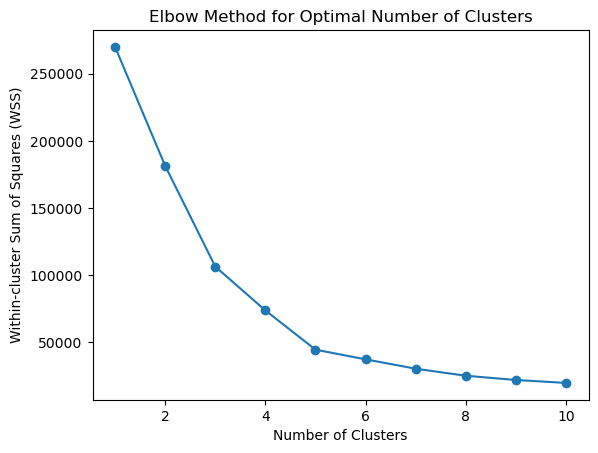

In [4]:
plt.plot(range(1,11), wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()



In [5]:
cluster = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmean = cluster.fit_predict(x)
print(y_kmean)

c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


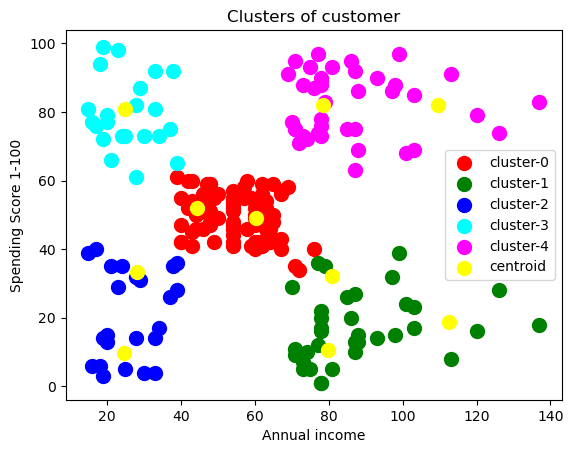

In [6]:
## Visualising the clusters
# x[y_kmean==0,0] => X[y_kmean==0]: mean first cluster X[,0]: mean first col of x which is Annual income
plt.scatter(x[y_kmean==0,0], x[y_kmean==0,1], c='red', s=100, label='cluster-0')
plt.scatter(x[y_kmean==1,0], x[y_kmean==1,1], c='green', s=100, label='cluster-1')
plt.scatter(x[y_kmean==2,0], x[y_kmean==2,1], c='blue', s=100, label='cluster-2')
plt.scatter(x[y_kmean==3,0], x[y_kmean==3,1], c='cyan', s=100, label='cluster-3')
plt.scatter(x[y_kmean==4,0], x[y_kmean==4,1], c='magenta', s=100, label='cluster-4')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c='yellow', label='centroid')

plt.title('Clusters of customer')
plt.xlabel('Annual income')
plt.ylabel('Spending Score 1-100')
plt.legend()
plt.show()